<a href="https://colab.research.google.com/github/SpecularAura/DAV-SEM5/blob/master/DAV_Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment - 2: Simple Linear Regression in Python

**Lab Outcomes (LO)**: Implement various Regression techniques for prediction. (LO2)


**Task to be performed:**

1. List the packages to be used for Simple Linear Regression in Python

2. Download the dataset from UCI Repository / Kaggle
  - Load data into Google Colab
  - Display the summary of the dataset

3. Check whether the data meets the assumptions
  - Normality : Check whether the dependent variable follows a normal distribution
  - Lineartiy : Check the relationship between the independent and dependent variable

4. Perform Linear Regression Analysis using the identified package

5. Visualize the results with a graph -- Draw the Simple Linear Regression line to the plotted data -- Add the equation for the Regression Line on the graph

6. Repeat the steps 2 to 5 using R libraries

7. Prepare a Colab Notebook with the Aim, Tasks performed, Program, Output, and Conclusion and upload the Notebook in your Github Repositiry.

8. Prepare a handwritten wrtieup with Aim, Theory and Conclusion.

# Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
df = pd.read_csv("Advertising.csv")
df = df[["TV", "sales"]]
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


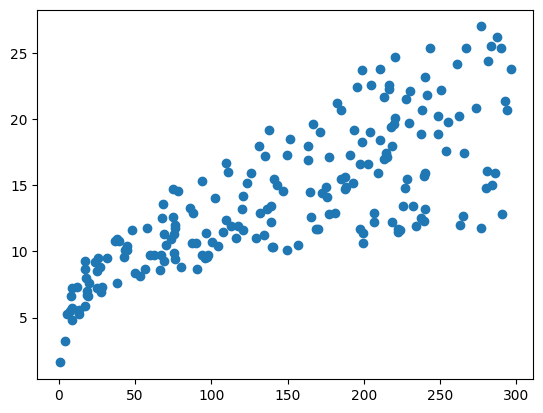

In [ ]:
plt.scatter(df['TV'], df['sales'])

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

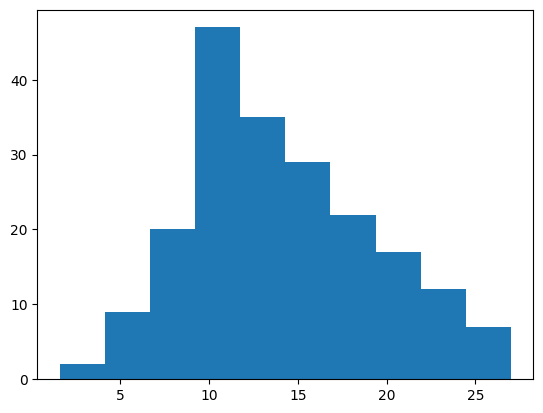

In [ ]:
plt.hist(df["sales"])

In [ ]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [ ]:
df.isnull().any(axis=0)

TV       False
sales    False
dtype: bool

In [ ]:
model = LinearRegression()
model.fit(df["TV"].values.reshape(-1, 1), df["sales"])

LinearRegression()

Text(0.01, 0.9, 'y = 7.033 + 0.048 * x')

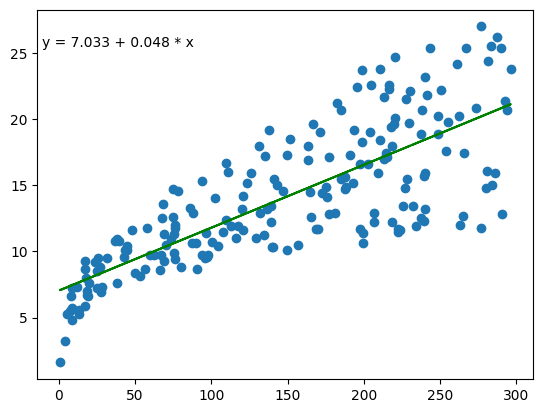

In [ ]:
y_pred = model.predict(df["TV"].values.reshape(-1, 1))
plt.scatter(df['TV'], df['sales'])
plt.plot(df["TV"], y_pred, color="green")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

# R

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
df <- read.csv("Advertising.csv")

In [ ]:
df = select(df,c("TV", "sales"))
head(df)

,TV,sales
,<dbl>,<dbl>
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
6,8.7,7.2


In [ ]:
colSums(is.na(df))

TV sales 
    0     0

In [ ]:
summary(df)

       TV             sales      
 Min.   :  0.70   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.:10.38  
 Median :149.75   Median :12.90  
 Mean   :147.04   Mean   :14.02  
 3rd Qu.:218.82   3rd Qu.:17.40  
 Max.   :296.40   Max.   :27.00  

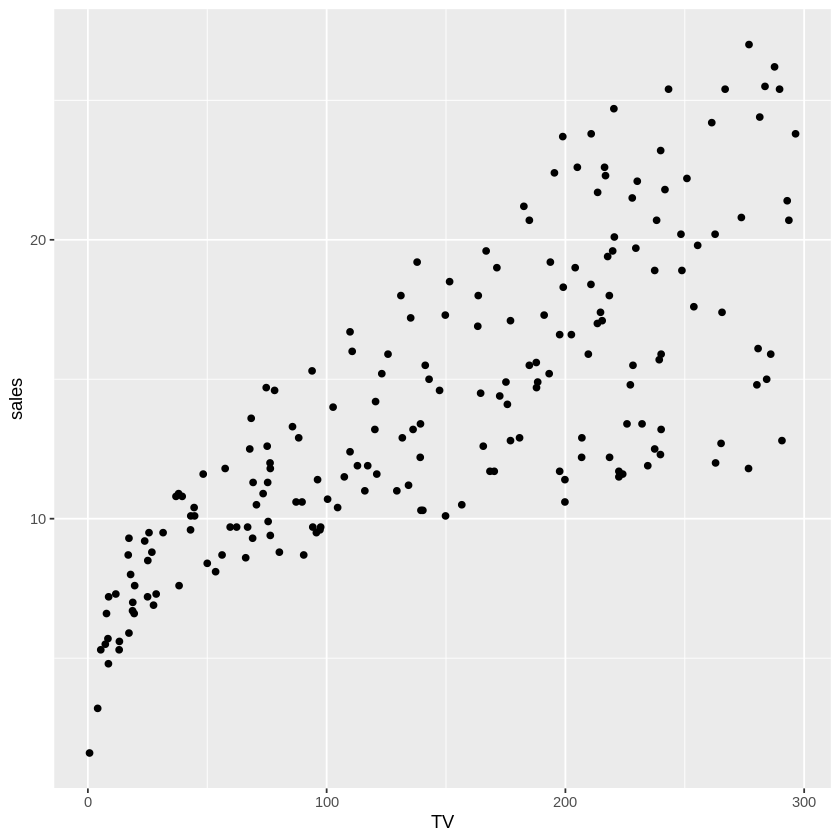

In [ ]:
ggplot(df, aes(x=TV, y=sales)) +
    geom_point()

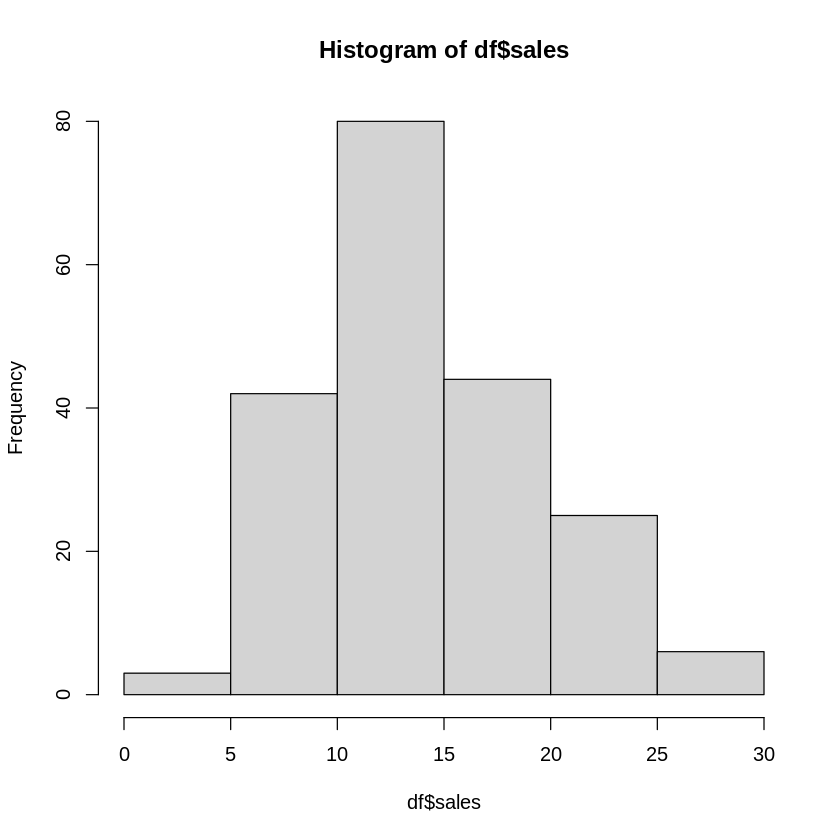

In [ ]:
hist(df$sales)

In [ ]:
model = lm(sales ~ TV, data=df)
summary(model)


Call:
lm(formula = sales ~ TV, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
pred <- predict(model, data = df$sales)

[1] "y = 7.032594 + 0.047537 * x"

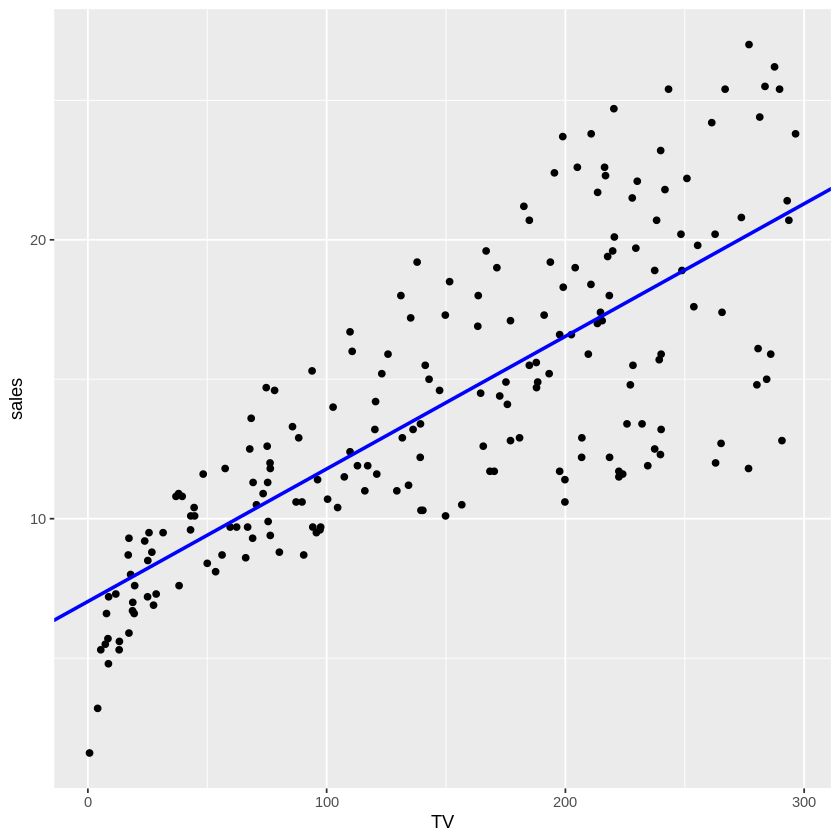

In [ ]:
ggplot(df, aes(x=TV, y=sales)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="blue",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])